In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
f = open('cal_metrics.json')

data_model = json.load(f)

f.close()

In [3]:
f = open('cal_metrics_oracle.json')

data_oracle = json.load(f)

f.close()

In [4]:
data_model.keys()

dict_keys(['ECE_from_biased_dist_human_maj_truth', 'ECE_from_biased_dist_orig_word_truth', 'ECE_from_unbiased_dist_human_maj_truth', 'ECE_from_unbiased_dist_orig_word_truth', 'TVD_biased_per_instance', 'TVD_unbiased_per_instance', 'TVD_biased_mean_std_min_max', 'TVD_unbiased_mean_std_min_max', 'KL-Divergenece_biased_per_instance', 'KL-Divergenece_biased_mean_std_min_max', 'Entropy_difference_biased_per_instance', 'Entropy_difference_unbiased_per_instance', 'Entropy_difference_biased_mean_std_min_max', 'Entropy_difference_unbiased_mean_std_min_max'])

In [5]:
data_oracle.keys()

dict_keys(['oracle1_repl_dict', 'oracle2_repl_dict', 'oracle1_no_repl_dict', 'oracle2_no_repl_dict'])

In [6]:
data_oracle['oracle1_repl_dict'].keys()

dict_keys(['ECE_dist_human_maj_truth', 'ECE_dist_orig_word_truth', 'TVD_per_instance', 'TVD_mean_std_min_max', 'Entropy_difference_per_instance', 'Entropy_difference_mean_std_min_max'])

### Expected Calibration Error

In [7]:
print('Model ECE results')
print('Biased dist. and human maj. as truth', data_model['ECE_from_biased_dist_human_maj_truth'])
print('Biased dist. and orig. word as truth', data_model['ECE_from_biased_dist_orig_word_truth'])
print('Unbiased dist. and human maj. as truth', data_model['ECE_from_unbiased_dist_human_maj_truth'])
print('Unbiased dist. and orig. word as truth', data_model['ECE_from_unbiased_dist_orig_word_truth'])

Model ECE results
Biased dist. and human maj. as truth 0.1302876123769613
Biased dist. and orig. word as truth 0.06809301189052314
Unbiased dist. and human maj. as truth 0.18551283936765967
Unbiased dist. and orig. word as truth 0.016350948903051107


In [8]:
print('Oracles (sampling with replacement) ECE results')
print('Biased dist. and human maj. as truth', data_oracle['oracle1_repl_dict']['ECE_dist_human_maj_truth'], data_oracle['oracle2_repl_dict']['ECE_dist_human_maj_truth'])
print('Biased dist. and orig. word as truth', data_oracle['oracle1_repl_dict']['ECE_dist_orig_word_truth'], data_oracle['oracle1_repl_dict']['ECE_dist_orig_word_truth'])

Oracles (sampling with replacement) ECE results
Biased dist. and human maj. as truth 0.5635491848327455 0.4576133850353289
Biased dist. and orig. word as truth 0.12160154088366681 0.12160154088366681


In [9]:
print('Oracles (sampling without replacement) ECE results')
print('Biased dist. and human maj. as truth', data_oracle['oracle1_no_repl_dict']['ECE_dist_human_maj_truth'], data_oracle['oracle2_no_repl_dict']['ECE_dist_human_maj_truth'])
print('Biased dist. and orig. word as truth', data_oracle['oracle1_no_repl_dict']['ECE_dist_orig_word_truth'], data_oracle['oracle1_no_repl_dict']['ECE_dist_orig_word_truth'])

Oracles (sampling without replacement) ECE results
Biased dist. and human maj. as truth 0.14708703166275253 0.56326985078582
Biased dist. and orig. word as truth 0.12378489570764968 0.12378489570764968


### Total Variation Distance

#### Biased distribution

In [10]:
print('TVD metrics (mean, st. dev., min, max)')
print('Model', data_model['TVD_biased_mean_std_min_max'])
print('Oracles (sampling with repl.)', data_oracle['oracle1_repl_dict']['TVD_mean_std_min_max'],  data_oracle['oracle2_repl_dict']['TVD_mean_std_min_max'])
print('Oracles (sampling without repl.)', data_oracle['oracle1_no_repl_dict']['TVD_mean_std_min_max'],  data_oracle['oracle2_no_repl_dict']['TVD_mean_std_min_max'])

TVD metrics (mean, st. dev., min, max)
Model [0.6016773299104461, 0.2207977535360531, 0.0009161029483948369, 0.9999999388381751]
Oracles (sampling with repl.) [0.20896302809328832, 0.08808164610584943, 0.0, 0.4761904846167281] [0.2035489881362356, 0.08575061987357024, 0.0, 0.4761904855037019]
Oracles (sampling without repl.) [0.3198903139720163, 0.14006503310500193, 0.0, 0.6500000093132259] [0.2677155259663032, 0.1281874293210226, 0.0, 0.595238103664347]


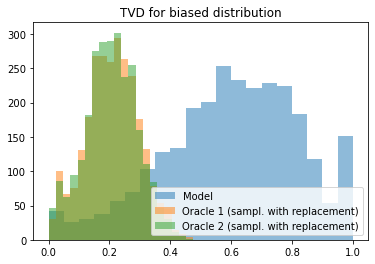

In [11]:
plt.hist(data_model['TVD_biased_per_instance'], bins=20, alpha=0.5, label='Model')
plt.hist(data_oracle['oracle1_repl_dict']['TVD_per_instance'], bins=20, alpha=0.5, label='Oracle 1 (sampl. with replacement)')
plt.hist(data_oracle['oracle2_repl_dict']['TVD_per_instance'], bins=20, alpha=0.5, label='Oracle 2 (sampl. with replacement)')

plt.title("TVD for biased distribution")
plt.legend(loc='lower right')
plt.show()

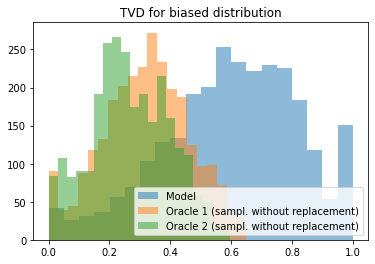

In [12]:
plt.hist(data_model['TVD_biased_per_instance'], bins=20, alpha=0.5, label='Model')
plt.hist(data_oracle['oracle1_no_repl_dict']['TVD_per_instance'], bins=20, alpha=0.5, label='Oracle 1 (sampl. without replacement)')
plt.hist(data_oracle['oracle2_no_repl_dict']['TVD_per_instance'], bins=20, alpha=0.5, label='Oracle 2 (sampl. without replacement)')

plt.title("TVD for biased distribution")
plt.legend(loc='lower right')
plt.show()

#### Unbiased Distribution

In [13]:
print('TVD metrics (mean, st. dev., min, max)')
print('Model', data_model['TVD_unbiased_mean_std_min_max'])

TVD metrics (mean, st. dev., min, max)
Model [0.6664502276019305, 0.21485069318944772, 0.004000004148110747, 1.0000000228756107]


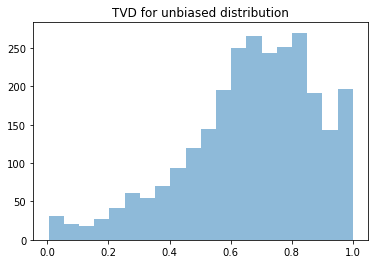

In [14]:
plt.hist(data_model['TVD_unbiased_per_instance'], bins=20, alpha=0.5)

plt.title("TVD for unbiased distribution")
plt.show()

### KL-Divergence

#### Biased Distribution

In [15]:
print('KL-Divergenece metrics (mean, st. dev., min, max)')
print('Model', data_model['KL-Divergenece_biased_mean_std_min_max'])

KL-Divergenece metrics (mean, st. dev., min, max)
Model [2.3293120382063366, 2.0405160097700614, 0.0009165432877024114, 20.396115605330415]


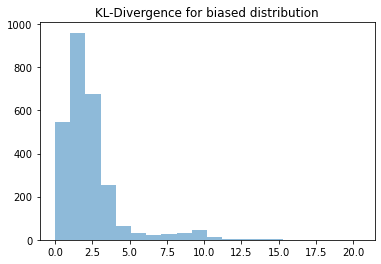

In [16]:
plt.hist(data_model['KL-Divergenece_biased_per_instance'], bins=20, alpha=0.5)
plt.title("KL-Divergence for biased distribution")

plt.show()

### Entropy difference

#### Biased distribution

In [17]:
print('Entropy difference metrics (mean, st. dev., min, max)')
print('Model', data_model['Entropy_difference_biased_mean_std_min_max'])
print('Oracles (sampling with repl.)', data_oracle['oracle1_repl_dict']['Entropy_difference_mean_std_min_max'],  data_oracle['oracle2_repl_dict']['Entropy_difference_mean_std_min_max'])
print('Oracles (sampling without repl.)', data_oracle['oracle1_no_repl_dict']['Entropy_difference_mean_std_min_max'],  data_oracle['oracle2_no_repl_dict']['Entropy_difference_mean_std_min_max'])

Entropy difference metrics (mean, st. dev., min, max)
Model [-0.9548252923611366, 0.8812976626974632, -4.361507415771484, 2.83367265396434]
Oracles (sampling with repl.) [0.14556253216748335, 0.1468999513183909, -0.2797493158758311, 0.6414748227682927] [0.3111901339135552, 0.16464259158044878, -0.23872054491442984, 0.7874082887232876]
Oracles (sampling without repl.) [0.16793216702528044, 0.24589848935571346, -0.38268412241436334, 0.9619110469591803] [0.30841947407917575, 0.2476745096798044, -0.1874135819636451, 1.1060572186995001]


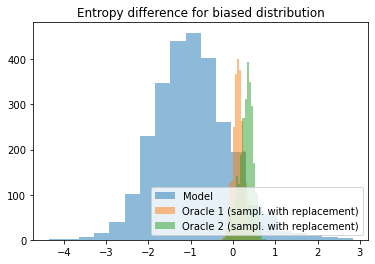

In [18]:
plt.hist(data_model['Entropy_difference_biased_per_instance'], bins=20, alpha=0.5, label='Model')
plt.hist(data_oracle['oracle1_repl_dict']['Entropy_difference_per_instance'], bins=20, alpha=0.5, label='Oracle 1 (sampl. with replacement)')
plt.hist(data_oracle['oracle2_repl_dict']['Entropy_difference_per_instance'], bins=20, alpha=0.5, label='Oracle 2 (sampl. with replacement)')

plt.title("Entropy difference for biased distribution")
plt.legend(loc='lower right')
plt.show()

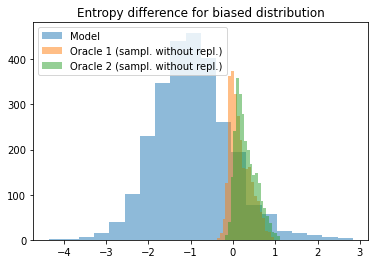

In [19]:
plt.hist(data_model['Entropy_difference_biased_per_instance'], bins=20, alpha=0.5, label='Model')
plt.hist(data_oracle['oracle1_no_repl_dict']['Entropy_difference_per_instance'], bins=20, alpha=0.5, label='Oracle 1 (sampl. without repl.)')
plt.hist(data_oracle['oracle2_no_repl_dict']['Entropy_difference_per_instance'], bins=20, alpha=0.5, label='Oracle 2 (sampl. without repl.)')

plt.title("Entropy difference for biased distribution")
plt.legend(loc='upper left')
plt.show()

#### Unbiased Distribution

In [20]:
print('Entropy difference metrics (mean, st. dev., min, max)')
print('Model', data_model['Entropy_difference_unbiased_mean_std_min_max'])

Entropy difference metrics (mean, st. dev., min, max)
Model [-1.8497544905630539, 1.0594360507853844, -5.149153864914582, 2.8010570764497893]


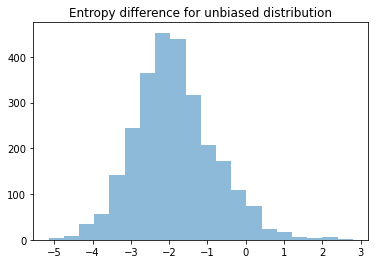

In [21]:
plt.hist(data_model['Entropy_difference_unbiased_per_instance'], bins=20, alpha=0.5)

plt.title("Entropy difference for unbiased distribution")

plt.show()